### Install Requirements

In [3]:
# 1. C# If needed, create a virtual environment by uncommenting the line below:
!python -m venv .venv

# Activate the virtual environment by running the appropriate command for your OS:
# On Windows:
!.\.venv\Scripts\activate

# On macOS/Linux:
# !source .venv/bin/activate

# Install the required packages by uncommenting the line below:
%pip install -r ./requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the dataset

In [4]:
import pandas as pd
from pathlib import Path

# Path to dataset
TELCO_DATA_PATH = Path("WA_Fn-UseC_-Telco-Customer-Churn.csv")

def load_dataset(file_path: Path) -> pd.DataFrame:
    """Load the CSV dataset with pandas."""
    return pd.read_csv(file_path)

# Load the dataset
df = load_dataset(TELCO_DATA_PATH)

In [5]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Summary stats numerical variables

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Summary stats categorical variables

In [7]:
df.describe(include='object')

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check         20.2    No  
freq               4171              2365           11  5174

Number of unique values

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert Total charges to numeric

In [10]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many NaNs were created
missing_totalcharges = df['TotalCharges'].isna().sum()
print(f"Number of missing values in TotalCharges after conversion: {missing_totalcharges}")

# Optionally, display the rows with missing TotalCharges
print(df[df['TotalCharges'].isna()])


Number of missing values in TotalCharges after conversion: 11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            N

Fill missing TotalCharges with 0
Since they have no tenure, their total charges logically should be zero.
tenure = 0 indicates customers who just joined or haven’t been active.
TotalCharges is missing because they haven’t been billed yet (no usage).

In [11]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'].isna().sum()

C:\Users\anas.mossad\AppData\Local\Temp\ipykernel_7312\1296288910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


np.int64(0)

Identified numerical and categorical columns and dropped the irrelevant customerID.

In [12]:
# Drop the customerID column since it's an identifier and not useful for modeling
df = df.drop(columns=['customerID'])

# Define numerical and categorical columns
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Target variable
target = 'Churn'

# Quick check
print("Numerical features:", num_features)
print("Categorical features:", cat_features)


Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Exploratory Data Analysis (EDA) on the features

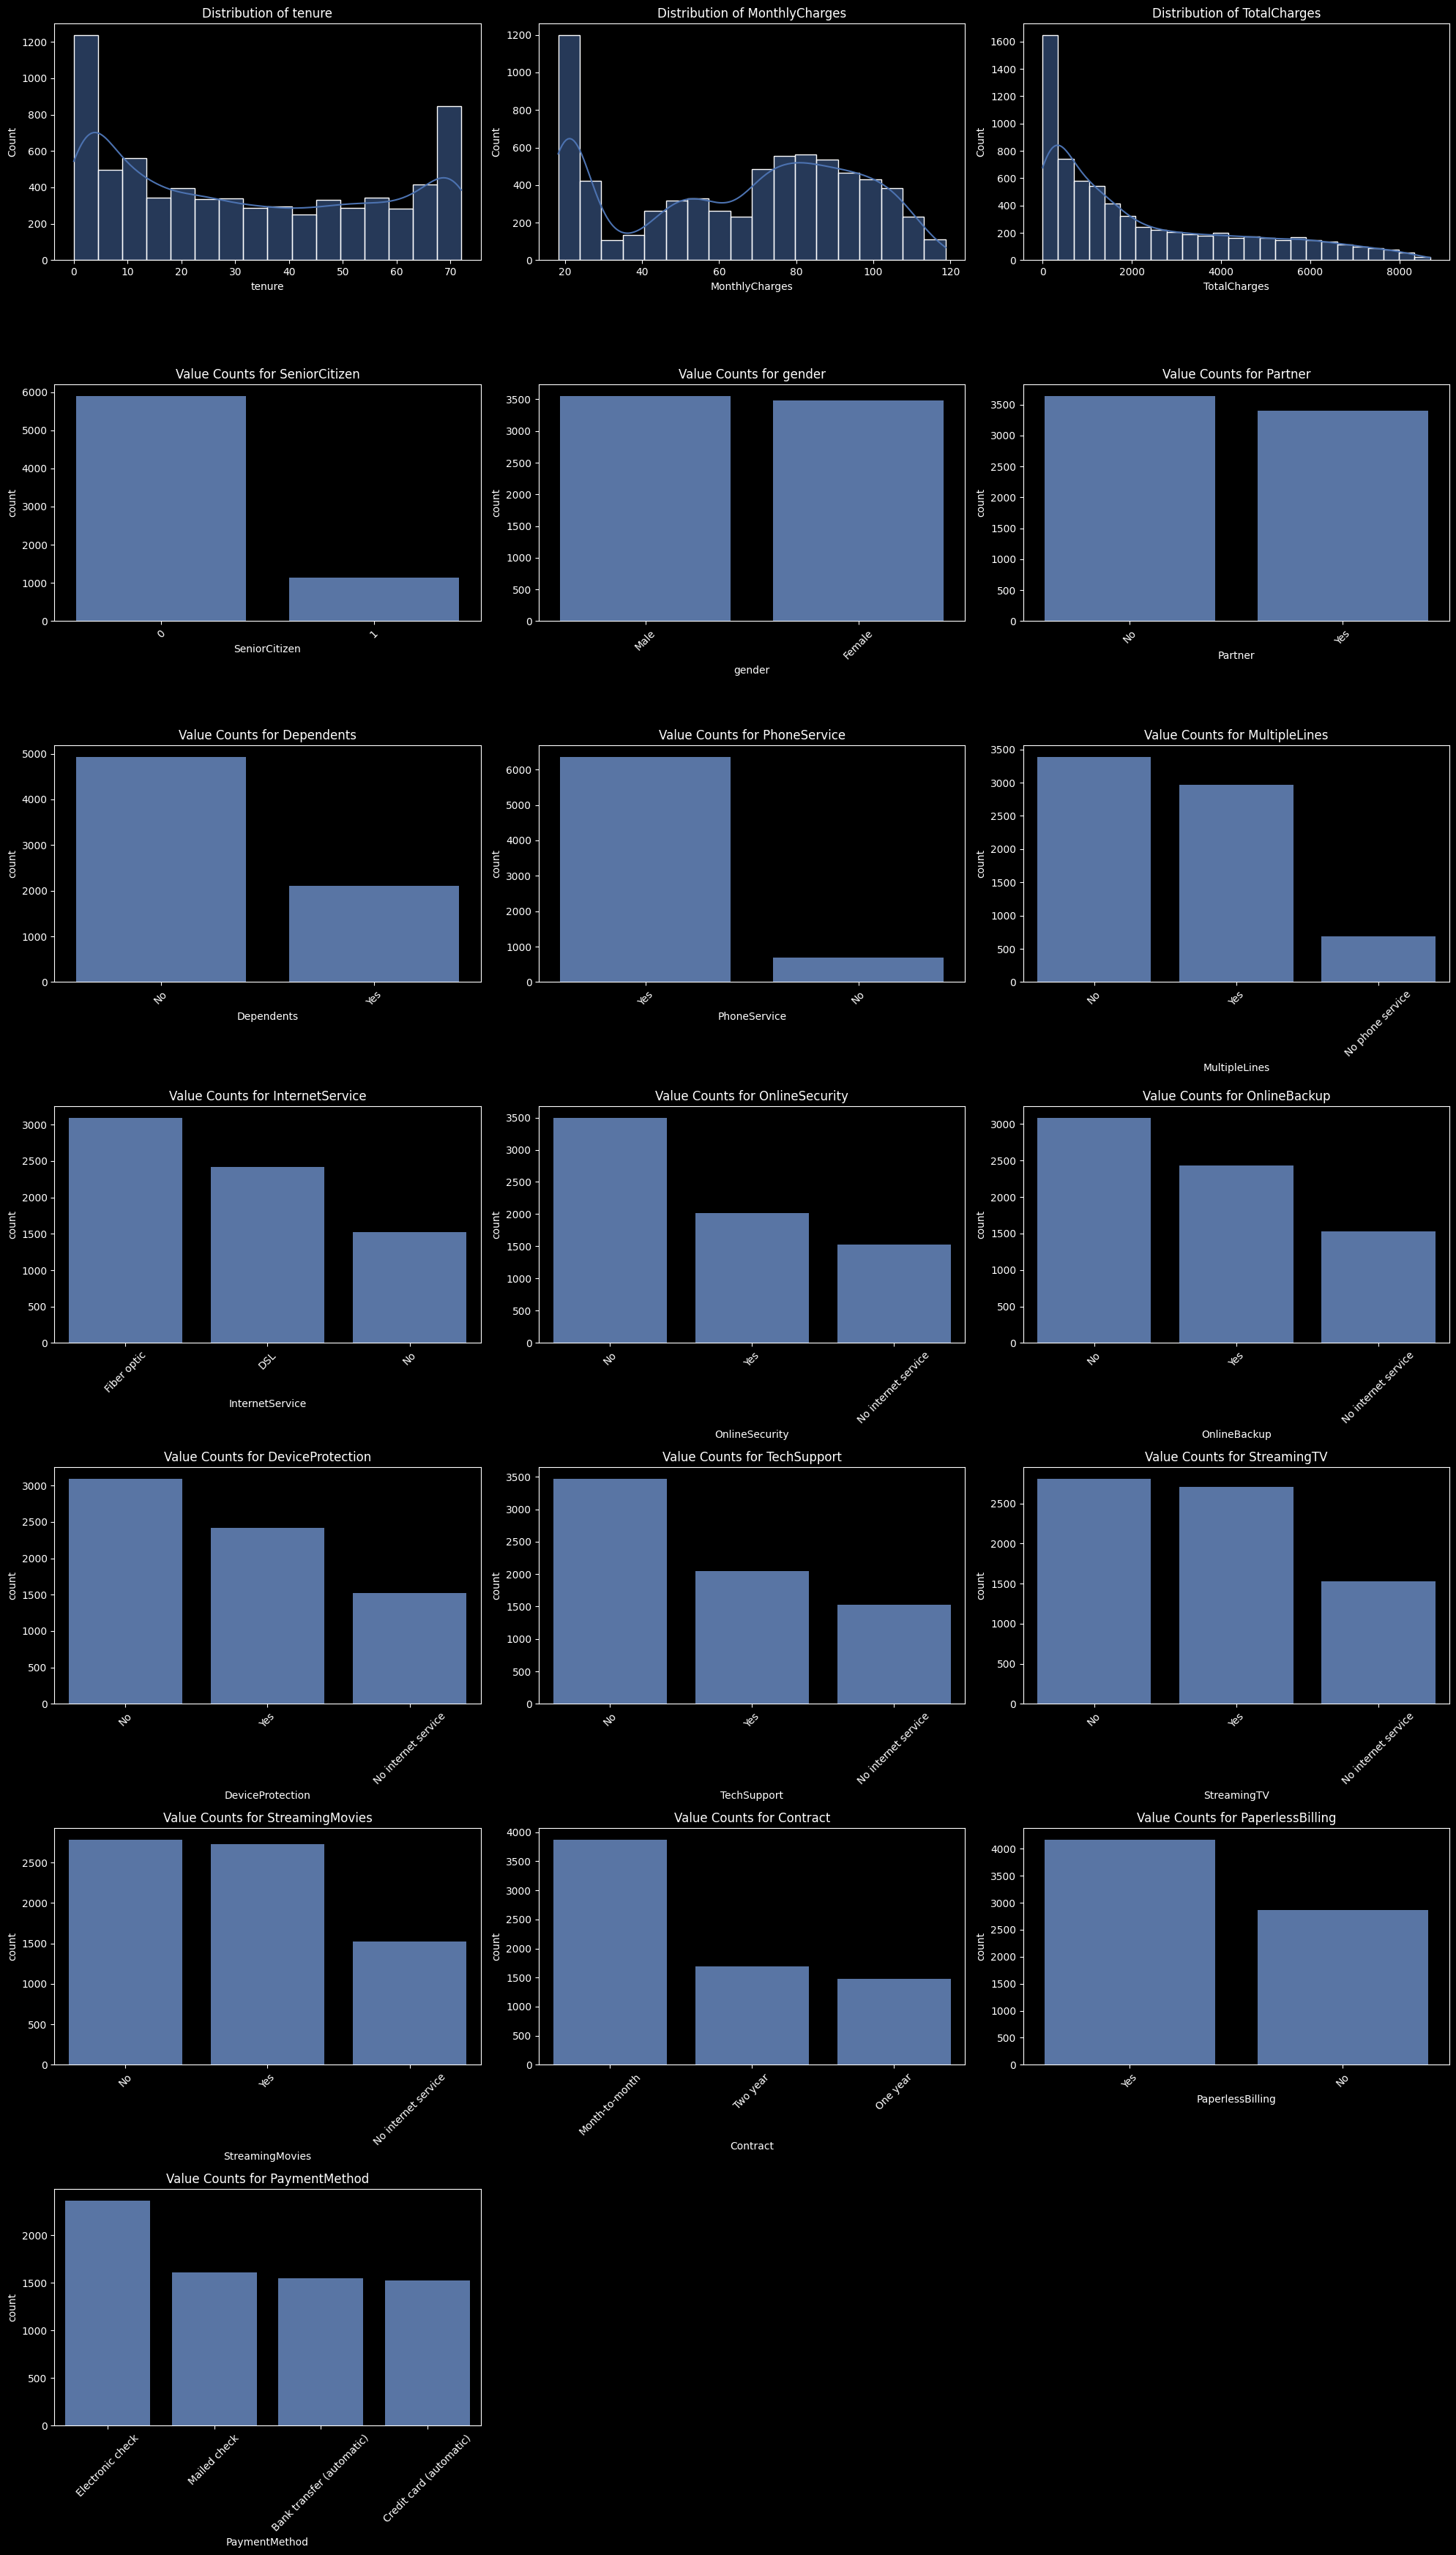

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark mode style
plt.style.use('dark_background')
sns.set_palette("deep")

# Total number of plots
total_plots = len(num_features) + len(cat_features)
cols = 3
rows = (total_plots + cols - 1) // cols

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot numeric features
for i, col in enumerate(num_features):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

# Plot categorical features
for i, col in enumerate(cat_features):
    idx = len(num_features) + i
    sns.countplot(data=df, x=col, ax=axes[idx], order=df[col].value_counts().index)
    axes[idx].set_title(f"Value Counts for {col}")
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty plots if any
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Step 4: Analyze Feature-Target Relationships

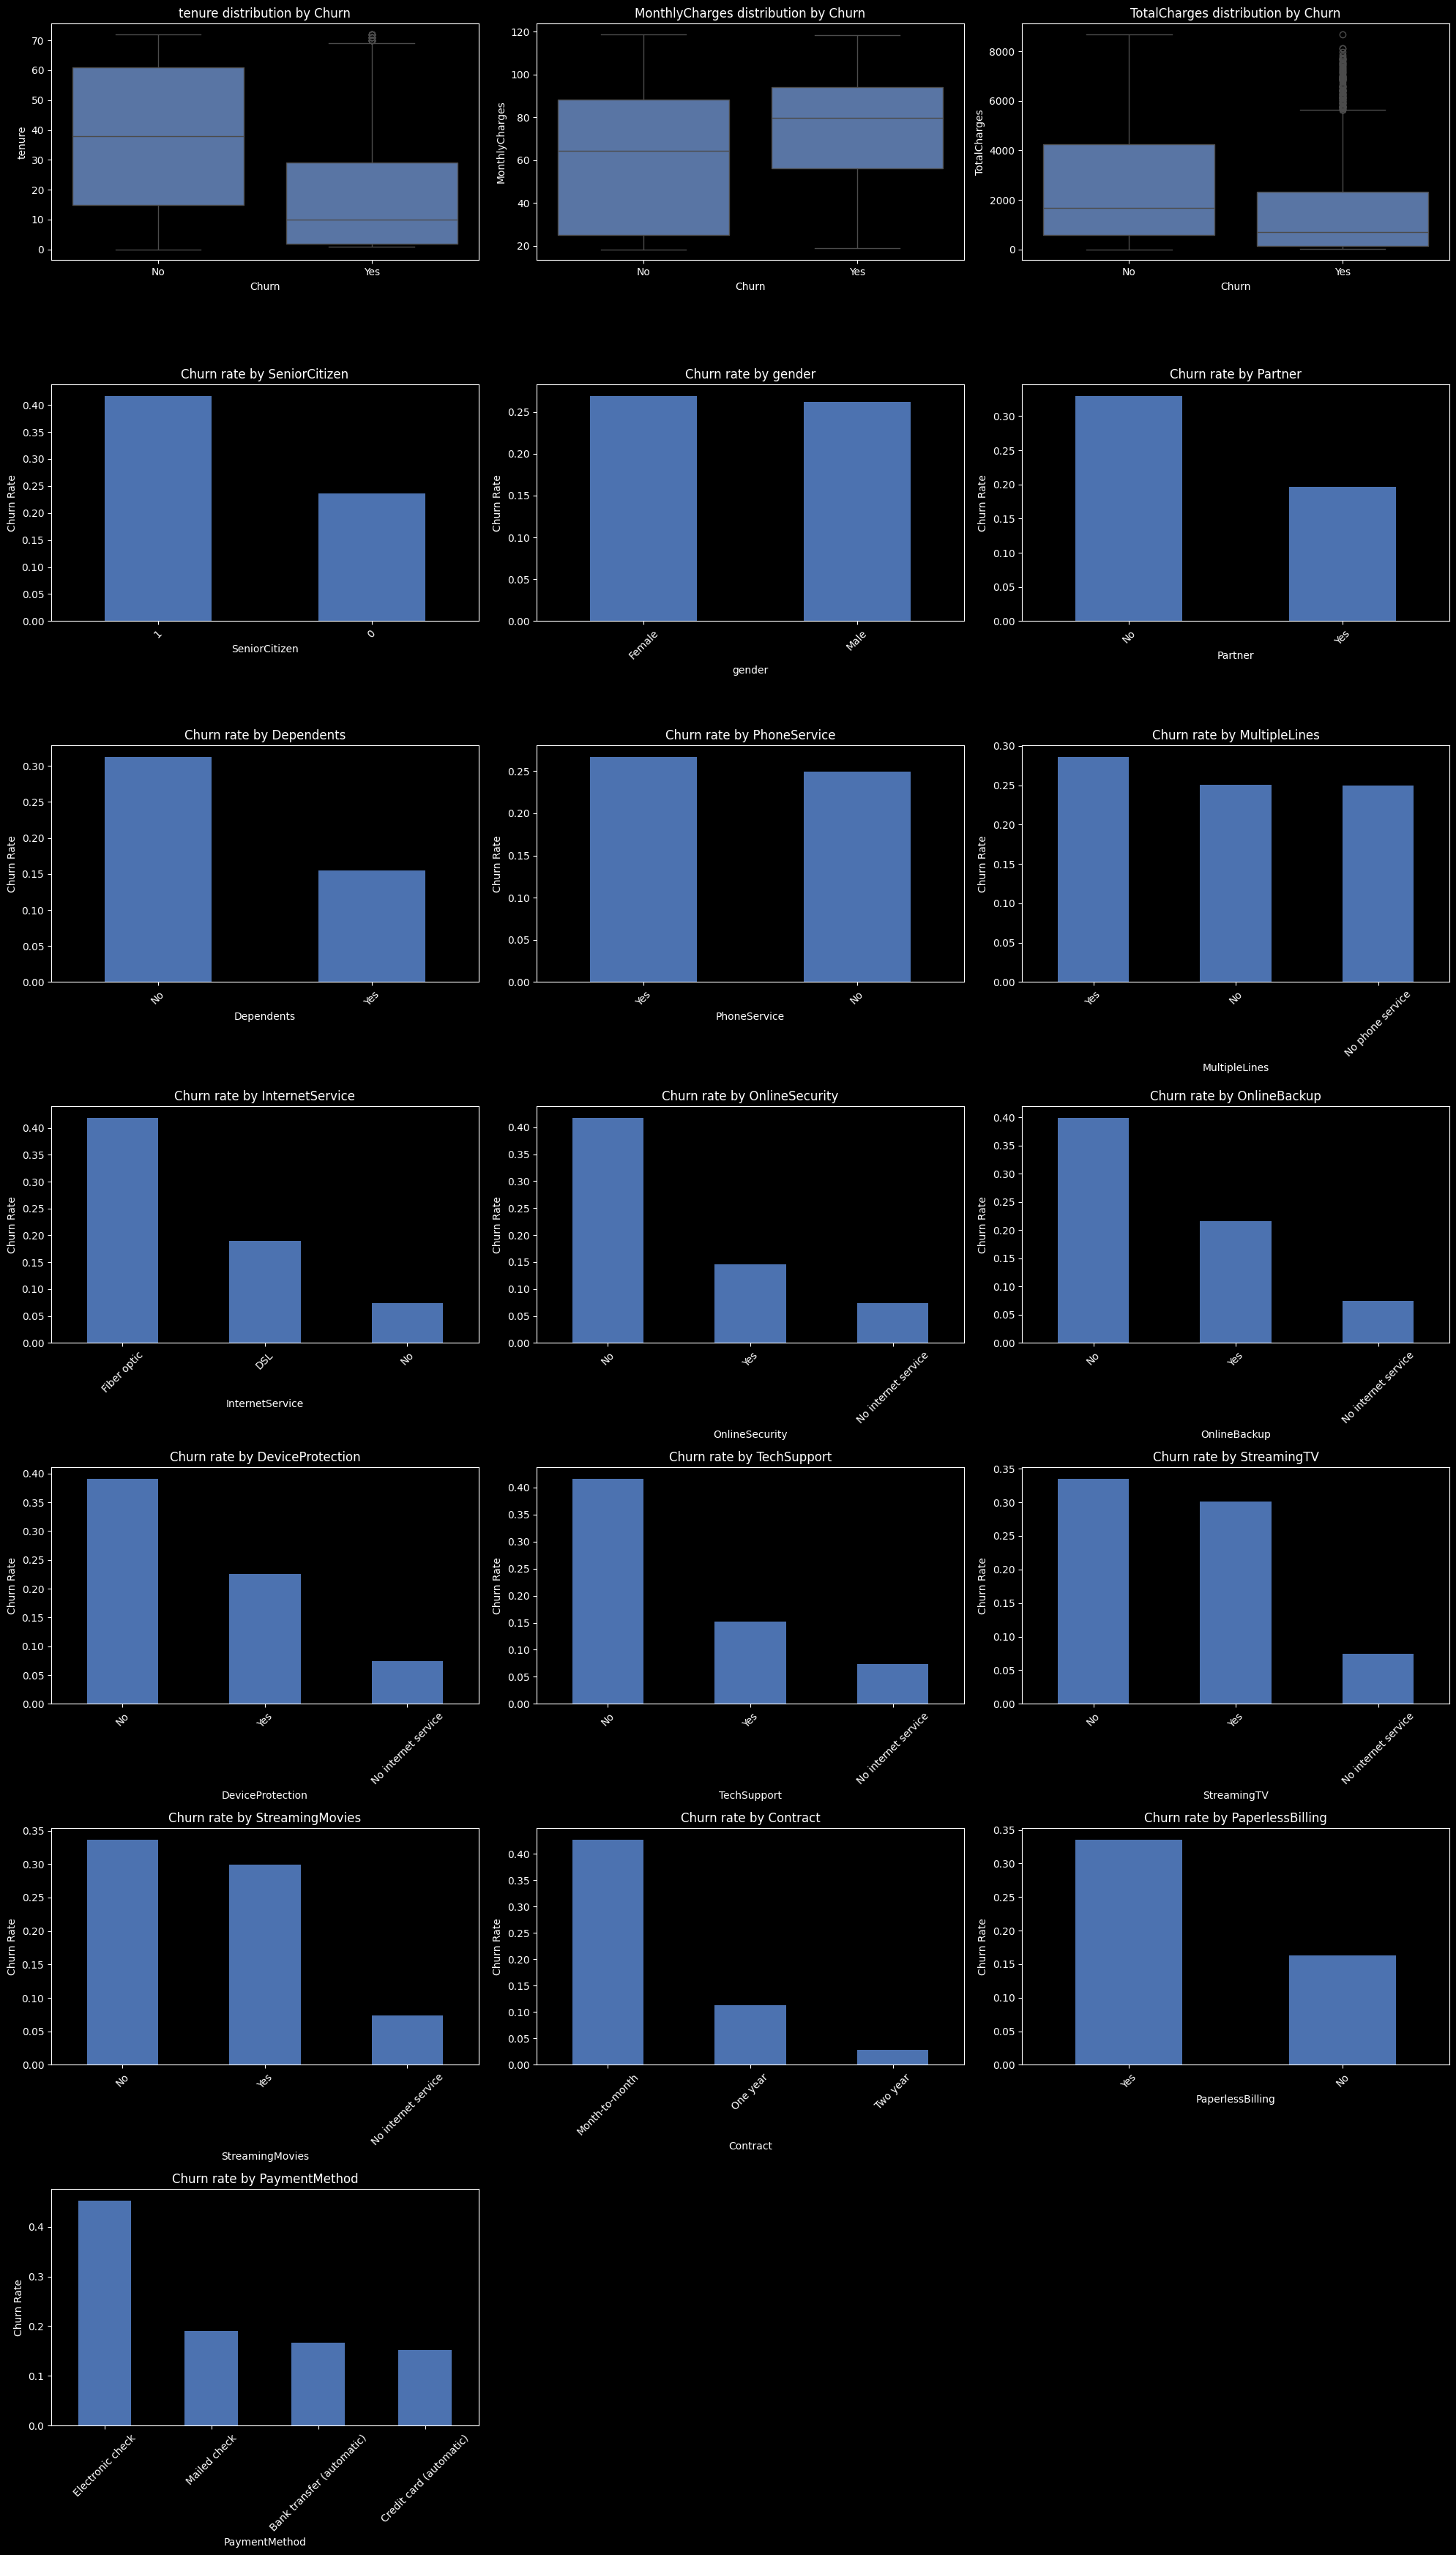

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark mode
plt.style.use('dark_background')
sns.set_palette("deep")

# Total number of plots
total_plots = len(num_features) + len(cat_features)
cols = 3
rows = (total_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Numerical features vs Churn (boxplots)
for i, col in enumerate(num_features):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} distribution by Churn')

# Categorical features vs Churn (proportion bar plots)
for i, col in enumerate(cat_features):
    idx = len(num_features) + i
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', None)
    if churn_rate is not None:
        churn_rate.sort_values(ascending=False).plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Churn rate by {col}')
        axes[idx].set_ylabel('Churn Rate')
        axes[idx].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Feature Engineering

Step 3: Combine both Preprocessors with and without One-Hot Incoding

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# List of numerical and categorical features (as you gave)
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling', 'PaymentMethod']


# --- 1. Preprocessor with One-Hot Encoding (OHE) ---
# Suitable for: Logistic Regression
ohe_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

# --- 2. Preprocessor without One-Hot Encoding (NO-OHE) ---
# Suitable for: Gradient Boosting
no_ohe_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ],
    remainder='passthrough'
)

We created two preprocessing pipelines to handle our features efficiently. One pipeline applies scaling to numerical features and one-hot encoding to categorical features, suitable for models like Logistic Regression that require numeric input. The other pipeline scales numerical features but leaves categorical features as-is, which works well for tree-based models like Random Forest or Gradient Boosting that can handle categorical data natively.

Why this step matters:

- It automates and standardizes data preparation for all features in a single, clean workflow.

- It ensures consistent preprocessing during training, testing, and future predictions, avoiding data leakage or mismatches.

- It keeps the code organized, maintainable, and ready for experimentation with different models.

## Logistic Regression :

### Baseline (GridSearch) : 

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'df' is your cleaned dataframe with target 'Churn' and preprocessor defined (from before)

# Mape target to boolean
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1}) # run once ONLY

# Features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split (70/30) stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define pipeline with preprocessor + Logistic Regression
pipeline = Pipeline([
    ('preprocessor', ohe_preprocessor),  # your ColumnTransformer with encoders/scalers
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Set up Stratified K-Fold CV with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'classifier__solver': ['lbfgs'],  # default solver, good for small datasets
}

# GridSearchCV with stratified CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',  # you can switch to f1 or roc_auc for imbalanced data
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best params & score
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Best CV accuracy: 0.8044624746450303
Test Accuracy: 0.808329389493611
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'df' is your cleaned dataframe with target 'Churn' and preprocessor defined (from before)

# Features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split (70/30) stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Define pipeline with preprocessor + Logistic Regression
pipeline = Pipeline([
    ('preprocessor', ohe_preprocessor),  # your ColumnTransformer with encoders/scalers
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Set up Stratified K-Fold CV with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'classifier__solver': ['lbfgs'],  # default solver, good for small datasets
}

# GridSearchCV with stratified CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',  # you can switch to f1 or roc_auc for imbalanced data
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best params & score
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Best CV accuracy: 0.8044624746450303
Test Accuracy: 0.808329389493611
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## Bayesian Search :

In [18]:
# -----------------------------
# IMPORTS
# -----------------------------
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Real
import numpy as np


# Features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# -----------------------------
# 2. Pipeline
# -----------------------------
pipeline = Pipeline([
    ('preprocessor', ohe_preprocessor),  # your ColumnTransformer
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# -----------------------------
# 3. Stratified K-Fold CV
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------------
# 4. Define Bayesian Search Space
# -----------------------------
search_spaces = {
    'classifier__C': Real(0.001, 100, prior='log-uniform'),  # regularization strength
    'classifier__solver': ['lbfgs']  # only valid for small datasets
}

# -----------------------------
# 5. F1 Scorer for Imbalanced Target
# -----------------------------
f1_scorer = make_scorer(f1_score, pos_label=1)

# -----------------------------
# 6. BayesSearchCV Setup
# -----------------------------
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=25,        
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# -----------------------------
# 7. Fit Bayesian Optimization
# -----------------------------
print("Starting Logistic Regression Bayesian Hyperparameter Search...")
bayes_search.fit(X_train, y_train)

# -----------------------------
# 8. Best Parameters & CV Score
# -----------------------------
print("\nBest hyperparameters:", bayes_search.best_params_)
print("Best CV F1 score:", bayes_search.best_score_)

# -----------------------------
# 9. Evaluate on Test Set
# -----------------------------
y_train_pred = bayes_search.predict(X_train)
y_pred = bayes_search.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Starting Logistic Regression Bayesian Hyperparameter Search...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 

## Random Forest


In [19]:
# -----------------------------
# IMPORTS
# -----------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# -----------------------------
# SPLIT DATA
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 3. Stratified K-Fold CV
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------------
# PIPELINE
# -----------------------------
rf_pipeline = Pipeline([
    ("preprocessor", ohe_preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# -----------------------------
# DEFINE BAYESIAN SEARCH SPACE
# -----------------------------
search_spaces = {
    "classifier__n_estimators": Integer(100, 600),
    "classifier__max_depth": Integer(3, 30),
    "classifier__min_samples_split": Integer(2, 20),
    "classifier__min_samples_leaf": Integer(1, 10),
    "classifier__max_features": Categorical(["sqrt", "log2", None]),
    "classifier__class_weight": Categorical([None, "balanced"])
}

# -----------------------------
# DEFINE F1 SCORER FOR YES/NO LABELS
# -----------------------------
f1_yes = make_scorer(f1_score, pos_label=1) #try 'Yes' if doesnt work (you prbbly didnt run the other models)

# -----------------------------
# BAYESIAN OPTIMIZATION
# -----------------------------
bayes_opt = BayesSearchCV(
    estimator=rf_pipeline,
    search_spaces=search_spaces,
    n_iter=25,          # number of iterations
    cv=skf,
    scoring=f1_yes,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# -----------------------------
# FIT THE MODEL
# -----------------------------
bayes_opt.fit(X_train, y_train)

# -----------------------------
# BEST PARAMETERS & CV SCORE
# -----------------------------
print("Best Hyperparameters:", bayes_opt.best_params_)
print("Best CV F1 Score:", bayes_opt.best_score_)

# -----------------------------
# EVALUATE ON TEST SET
# -----------------------------
y_train_pred = bayes_opt.predict(X_train)
y_pred = bayes_opt.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\anas.mossad\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('balanced'), np.int64(30), np.str_('sqrt'), np.int64(10), np.int64(20), np.int64(100)] before, using random point [None, np.int64(18), 'sqrt', np.int64(2), np.int64(6), np.int64(173)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anas.mossad\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('balanced'), np.int64(30), np.str_('sqrt'), np.int64(10), np.int64(20), np.int64(100)] before, using random point [None, np.int64(20), 'sqrt', np.int64(6), np.int64(4), np.int64(485)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anas.mossad\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('balanced'), np.int64(30), np.str_('sqrt'), np.int64(10), np.int64(20), np.int64(100)] before, using random point [None, np.int64(22), None, np.int64(8), np.int64(18), np.int64(309)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anas.mossad\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('balanced'), np.int64(30), np.str_('sqrt'), np.int64(10), np.int64(20), np.int64(100)] before, using random point [None, np.int64(23), 'sqrt', np.int64(4), np.int64(18), np.int64(197)]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: OrderedDict({'classifier__class_weight': 'balanced', 'classifier__max_depth': 28, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 126})
Best CV F1 Score: 0.635317966981655
Train Accuracy: 0.8029818956336529
Test Accuracy: 0.7636621717530163

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1035
           1       0.54      0.78      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



## Gradient Boost Tree

In [21]:
# -----------------------------
# IMPORTS
# -----------------------------
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report

# -----------------------------
# 1. Preprocessor (Minimal, only numeric)
# -----------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

minimal_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features)
    ],
    remainder='passthrough'  # leave categorical untouched
)

# -----------------------------
# 2. CatBoost Pipeline
# -----------------------------
num_features_count = len(num_features)
cat_indices = list(range(num_features_count, num_features_count + len(cat_features)))

catboost_pipeline = Pipeline([
    ('preprocessor', minimal_preprocessor),
    ('classifier', CatBoostClassifier(
        verbose=0,
        random_state=42,
        cat_features=cat_indices
    ))
])

# -----------------------------
# 3. Define Bayesian Search Space
# -----------------------------
search_spaces_catboost = {
    'classifier__iterations': Integer(100, 500),
    'classifier__learning_rate': Real(0.01, 0.3, "log-uniform"),
    'classifier__depth': Integer(4, 10),
    'classifier__l2_leaf_reg': Integer(1, 10)
}

# -----------------------------
# 4. Scorer for Imbalanced Labels (F1 Yes)
# -----------------------------
f1_yes = make_scorer(f1_score, pos_label=1) # try 'Yes' if doesnt work (you prbbly didnt run the other models)

# -----------------------------
# 5. BayesSearchCV Setup
# -----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
bayes_opt_catboost = BayesSearchCV(
    estimator=catboost_pipeline,
    search_spaces=search_spaces_catboost,
    n_iter=25,  # number of iterations
    cv=skf,
    scoring=f1_yes,  # better for imbalanced Churn
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# -----------------------------
# 6. Fit the Bayesian Search
# -----------------------------
print("Starting CatBoost Bayesian Hyperparameter Search...")
bayes_opt_catboost.fit(X_train, y_train)

# -----------------------------
# 7. Best Parameters & CV Score
# -----------------------------
print("\n" + "="*50)
print("CatBoost Bayesian Optimization Results")
print("Best hyperparameters:", bayes_opt_catboost.best_params_)
print("Best CV F1 Score:", bayes_opt_catboost.best_score_)
print("="*50 + "\n")

# -----------------------------
# 8. Evaluate on Test Set
# -----------------------------
y_pred_catboost = bayes_opt_catboost.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_catboost)
print("\n--- CatBoost Test Set Evaluation ---")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_catboost))


Starting CatBoost Bayesian Hyperparameter Search...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitt

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>Preprocessing</th>
      <th>Hyperparameter Optimization</th>
      <th>CV F1 Score</th>
      <th>Train Accuracy</th>
      <th>Test Accuracy</th>
      <th>Precision (Yes)</th>
      <th>Recall (Yes)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression (Grid Search)</td>
      <td>One-Hot Encoding + Scaling</td>
      <td>Grid Search</td>
      <td>0.610</td>
      <td>0.805</td>
      <td>0.808</td>
      <td>0.67</td>
      <td>0.56</td>
    </tr>
    <tr>
      <td>Logistic Regression (Bayesian)</td>
      <td>One-Hot Encoding + Scaling</td>
      <td>Bayesian Optimization</td>
      <td>0.599</td>
      <td>0.805</td>
      <td>0.808</td>
      <td>0.67</td>
      <td>0.56</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>One-Hot Encoding + Scaling</td>
      <td>Bayesian Optimization</td>
      <td>0.641</td>
      <td>0.803</td>
      <td>0.764</td>
      <td>0.54</td>
      <td>0.78</td>
    </tr>
    <tr>
      <td>CatBoost</td>
      <td>Scaling numerical, categorical native</td>
      <td>Bayesian Optimization</td>
      <td>0.607</td>
      <td>0.799</td>
      <td>0.800</td>
      <td>0.66</td>
      <td>0.52</td>
    </tr>
  </tbody>
</table>
